In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you D a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/t5embeds/train_ids.npy
/kaggle/input/t5embeds/test_embeds.npy
/kaggle/input/t5embeds/train_embeds.npy
/kaggle/input/t5embeds/test_ids.npy
/kaggle/input/cafa-5-protein-function-prediction/sample_submission.tsv
/kaggle/input/cafa-5-protein-function-prediction/IA.txt
/kaggle/input/cafa-5-protein-function-prediction/Test (Targets)/testsuperset.fasta
/kaggle/input/cafa-5-protein-function-prediction/Test (Targets)/testsuperset-taxon-list.tsv
/kaggle/input/cafa-5-protein-function-prediction/Train/train_terms.tsv
/kaggle/input/cafa-5-protein-function-prediction/Train/train_sequences.fasta
/kaggle/input/cafa-5-protein-function-prediction/Train/train_taxonomy.tsv
/kaggle/input/cafa-5-protein-function-prediction/Train/go-basic.obo


In [2]:
!pip install protlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 5.6 MB/s eta 0:00:00


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
print("TensorFlow v" + tf.__version__)
print("Numpy v" + np.__version__)

TensorFlow v2.12.0
Numpy v1.23.5


In [5]:
df = pd.read_csv('/kaggle/input/cafa-5-protein-function-prediction/Train/train_terms.tsv', sep='\t')
df.head()

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO


In [6]:
# count number of annotations per GO term
print(df.shape)
print(df['term'].value_counts(ascending=True).iloc[-1500:])

(5363863, 3)
GO:0016887      430
GO:0051048      430
GO:0051783      431
GO:0031674      431
GO:0001818      431
              ...  
GO:0005622    70785
GO:0003674    78637
GO:0110165    91286
GO:0008150    92210
GO:0005575    92912
Name: term, Length: 1500, dtype: int64


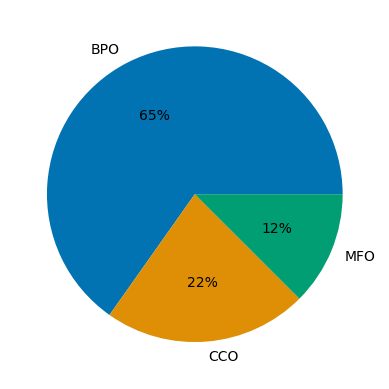

In [7]:
# pie chart to show distribution across BP, MF and CC
pie_df = df['aspect'].value_counts()
palette_color = sns.color_palette('colorblind')
plt.pie(pie_df.values, labels=np.array(pie_df.index), colors=palette_color, autopct='%.0f%%')
plt.show()

In [8]:
# Set the limit for label
num_of_labels = 1500

# Take value counts in descending order and fetch first 1500 `GO term ID` as labels - [:num_of_labels]
labels = df['term'].value_counts().index[:num_of_labels].tolist()

In [9]:
print(labels)

['GO:0005575', 'GO:0008150', 'GO:0110165', 'GO:0003674', 'GO:0005622', 'GO:0009987', 'GO:0043226', 'GO:0043229', 'GO:0005488', 'GO:0043227', 'GO:0005737', 'GO:0043231', 'GO:0005515', 'GO:0065007', 'GO:0050789', 'GO:0050794', 'GO:0050896', 'GO:0008152', 'GO:0032501', 'GO:0005634', 'GO:0032502', 'GO:0071704', 'GO:0048856', 'GO:0016020', 'GO:0003824', 'GO:0044237', 'GO:0044238', 'GO:0007275', 'GO:0006807', 'GO:0071944', 'GO:0071840', 'GO:0019222', 'GO:0016043', 'GO:0048518', 'GO:0005829', 'GO:0043170', 'GO:0048731', 'GO:0060255', 'GO:0051716', 'GO:0005886', 'GO:0032991', 'GO:0043228', 'GO:0043232', 'GO:0031974', 'GO:0043233', 'GO:0070013', 'GO:0048519', 'GO:0048522', 'GO:0080090', 'GO:0031323', 'GO:0042221', 'GO:1901564', 'GO:0051171', 'GO:0006950', 'GO:0010468', 'GO:0051179', 'GO:0048869', 'GO:0031981', 'GO:0030154', 'GO:0012505', 'GO:0048513', 'GO:0097159', 'GO:0009653', 'GO:1901363', 'GO:0048523', 'GO:1901360', 'GO:0051234', 'GO:0034641', 'GO:0007154', 'GO:0009605', 'GO:0009889', 'GO:0

In [10]:
# count for number of protein sequences mapped to GO terms (labels) under consideration
counts = df['term'].value_counts()

filteredCounts = counts[labels]

In [11]:
print(filteredCounts)

GO:0005575    92912
GO:0008150    92210
GO:0110165    91286
GO:0003674    78637
GO:0005622    70785
              ...  
GO:0051783      431
GO:0031674      431
GO:0001818      431
GO:0006874      430
GO:0016887      430
Name: term, Length: 1500, dtype: int64


In [12]:
# Fetch the train_terms data for the relevant labels only
train_terms_updated = df.loc[df['term'].isin(labels)]
print(train_terms_updated.shape)

(4420737, 3)


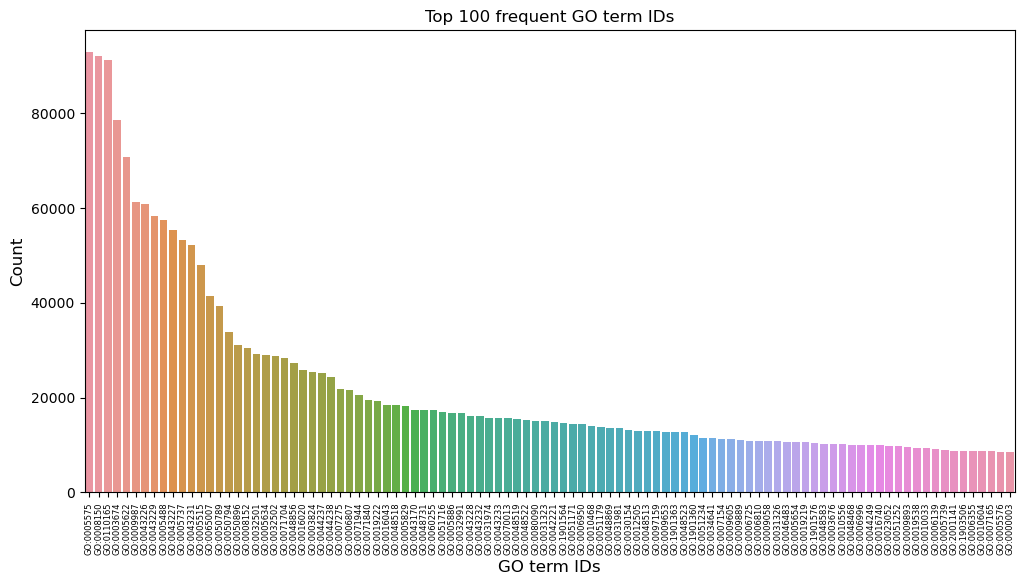

In [13]:
plot_df = df['term'].value_counts().iloc[:100]

figure, axis = plt.subplots(1, 1, figsize=(12, 6))

bp = sns.barplot(ax=axis, x=np.array(plot_df.index), y=plot_df.values)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90, size = 6)
axis.set_title('Top 100 frequent GO term IDs')
bp.set_xlabel("GO term IDs", fontsize = 12)
bp.set_ylabel("Count", fontsize = 12)
plt.show()

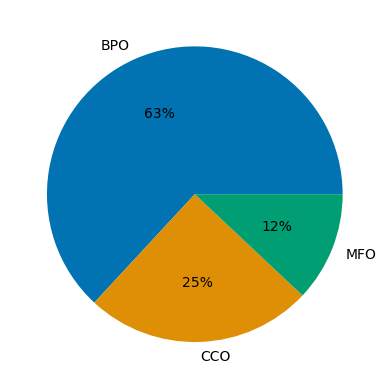

In [14]:
# pie chart to show distribution across BP, MF and CC for only 1500 labels
pie_df2 = train_terms_updated['aspect'].value_counts()
palette_color = sns.color_palette('colorblind')
plt.pie(pie_df2.values, labels=np.array(pie_df2.index), colors=palette_color, autopct='%.0f%%')
plt.show()

In [15]:
display(train_terms_updated)

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO
6,A0A009IHW8,GO:0044237,BPO
...,...,...,...
5363857,X5L565,GO:0003674,MFO
5363859,X5L565,GO:0016491,MFO
5363860,X5M5N0,GO:0005515,MFO
5363861,X5M5N0,GO:0005488,MFO


In [16]:
# trainProteinIds = df['EntryID'].unique().tolist()
# print(len(trainProteinIds))
trainProteinIds = np.load('/kaggle/input/t5embeds/train_ids.npy')
print(trainProteinIds.shape)
print(type(trainProteinIds))

(142246,)
<class 'numpy.ndarray'>


In [17]:
from Bio import SeqIO
fastaFile = '/kaggle/input/cafa-5-protein-function-prediction/Train/train_sequences.fasta'

In [18]:
''''
function to create a dictionary from train sequence fasta.
This will help us create a dictionary where each key is a protein id and 
the value is the corresponding protein sequence
'''
def createProteinDict(fasta):
    # Create an empty dictionary to store proteinID: proteinValue
    proteinDict = {}
    for record in SeqIO.parse(fasta, "fasta"):
        proteinId = record.id
        protein_sequence = str(record.seq)
        proteinDict[proteinId] = protein_sequence

    return proteinDict

In [19]:
'''
create a dictionary with EntryID (Protein ID) as Key and protein sequence as value
'''
proteinDict = createProteinDict(fastaFile)

In [20]:
!pip install aaindex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.7/373.7 kB 9.2 MB/s eta 0:00:0000:01


In [21]:
'''Using aaIndex1 package to extract values of important physiochemical properties'''
from aaindex import aaindex1
# ARGP820101 Hydrophobicity index (Argos et al., 1982)
hydrophobicity = aaindex1['ARGP820101'].values
print("hydrophobicity")
print(hydrophobicity)

# HOPT810101  Hydrophilicity value (Hopp-Woods, 1981)
hydrophilicity = aaindex1['HOPT810101'].values
print('hydrophilicity')
print(hydrophilicity)

# KARP850101  Flexibility parameter for no rigid neighbors (Karplus-Schulz, 1985)
flexibility = aaindex1['KARP850101'].values
print('flexibility')
print(flexibility)

# CHAM820101  Polarizability parameter (Charton-Charton, 1982)
pp = aaindex1['CHAM820101'].values
print("Polarizability parameter")
print(pp)

#FAUJ880103  Normalized van der Waals volume
nmv = aaindex1['FAUJ880103'].values
print('Normalized van der Waals volume')
print(nmv)

# ZIMJ680103  Polarity (Zimmerman et al., 1968)
polarity = aaindex1['ZIMJ680103'].values
print('polarity')
print(polarity)

# ZIMJ680104  Isoelectric point (Zimmerman et al., 1968)
isoelectric = aaindex1['ZIMJ680104'].values
print('isoelectric')
print(isoelectric)

# ZIMJ680102  Bulkiness (Zimmerman et al., 1968)
bulkiness = aaindex1['ZIMJ680102'].values
print('bulkiness')
print(bulkiness)


# FASG760101 Molecular weight (Fasman, 1976)
weight = aaindex1['FASG760101'].values
print('Molecular weight')
print(weight)

# JANJ780101  Average accessible surface area (Janin et al., 1978)
surfaceArea = aaindex1['JANJ780101'].values
print('Surface Area')
print(surfaceArea)


# add 5 more properties
# ANDN920101 alpha-CH chemical shifts (Andersen et al., 1992)
chemShift = aaindex1['ANDN920101'].values
print('alpha-CH chemical shifts')
print(chemShift)

# BIGC670101 Residue volume (Bigelow, 1967)
vol = aaindex1['BIGC670101'].values
print('R. Volume')
print(vol)

# DAYM780201 Relative mutability (Dayhoff et al., 1978b)
mutability = aaindex1['DAYM780201'].values
print('mutability')
print(mutability)

# FAUJ880108 Localized electrical effect (Fauchere et al., 1988)
electrical = aaindex1['FAUJ880108'].values
print('electrical')
print(electrical)

# CHAM810101 Steric parameter (Charton, 1981)
steric = aaindex1['CHAM810101'].values
print('steric')
print(steric)

hydrophobicity
{'-': 0, 'A': 0.61, 'C': 1.07, 'D': 0.46, 'E': 0.47, 'F': 2.02, 'G': 0.07, 'H': 0.61, 'I': 2.22, 'K': 1.15, 'L': 1.53, 'M': 1.18, 'N': 0.06, 'P': 1.95, 'Q': 0.0, 'R': 0.6, 'S': 0.05, 'T': 0.05, 'V': 1.32, 'W': 2.65, 'Y': 1.88}
hydrophilicity
{'-': 0, 'A': -0.5, 'C': -1.0, 'D': 3.0, 'E': 3.0, 'F': -2.5, 'G': 0.0, 'H': -0.5, 'I': -1.8, 'K': 3.0, 'L': -1.8, 'M': -1.3, 'N': 0.2, 'P': 0.0, 'Q': 0.2, 'R': 3.0, 'S': 0.3, 'T': -0.4, 'V': -1.5, 'W': -3.4, 'Y': -2.3}
flexibility
{'-': 0, 'A': 1.041, 'C': 0.96, 'D': 1.033, 'E': 1.094, 'F': 0.93, 'G': 1.142, 'H': 0.982, 'I': 1.002, 'K': 1.093, 'L': 0.967, 'M': 0.947, 'N': 1.117, 'P': 1.055, 'Q': 1.165, 'R': 1.038, 'S': 1.169, 'T': 1.073, 'V': 0.982, 'W': 0.925, 'Y': 0.961}
Polarizability parameter
{'-': 0, 'A': 0.046, 'C': 0.128, 'D': 0.105, 'E': 0.151, 'F': 0.29, 'G': 0.0, 'H': 0.23, 'I': 0.186, 'K': 0.219, 'L': 0.186, 'M': 0.221, 'N': 0.134, 'P': 0.131, 'Q': 0.18, 'R': 0.291, 'S': 0.062, 'T': 0.108, 'V': 0.14, 'W': 0.409, 'Y': 0.2

In [22]:
# list of input properties
listOfProperties = [hydrophobicity, hydrophilicity, flexibility, pp, nmv,
                    polarity, isoelectric, bulkiness, weight, surfaceArea,
                    chemShift, vol, mutability, electrical, steric]

# combined dictionary with arrays as values
combinedDictionary = {key: [] for key in listOfProperties[0]}

# combined dictionary with values from input dictionaries
for key in combinedDictionary:
    for dictionary in listOfProperties:
        combinedDictionary[key].append(float(dictionary[key]))

print(combinedDictionary)

{'-': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'A': [0.61, -0.5, 1.041, 0.046, 1.0, 0.0, 6.0, 11.5, 89.09, 27.8, 4.35, 52.6, 100.0, -0.01, 0.52], 'C': [1.07, -1.0, 0.96, 0.128, 2.43, 1.48, 5.05, 13.46, 121.15, 15.5, 4.65, 68.3, 20.0, 0.12, 0.62], 'D': [0.46, 3.0, 1.033, 0.105, 2.78, 49.7, 2.77, 11.68, 133.1, 60.6, 4.76, 68.4, 106.0, 0.15, 0.76], 'E': [0.47, 3.0, 1.094, 0.151, 3.78, 49.9, 3.22, 13.57, 147.13, 68.2, 4.29, 84.7, 102.0, 0.07, 0.68], 'F': [2.02, -2.5, 0.93, 0.29, 5.89, 0.35, 5.48, 19.8, 165.19, 25.5, 4.66, 113.9, 41.0, 0.03, 0.7], 'G': [0.07, 0.0, 1.142, 0.0, 0.0, 0.0, 5.97, 3.4, 75.07, 24.5, 3.97, 36.3, 49.0, 0.0, 0.0], 'H': [0.61, -0.5, 0.982, 0.23, 4.66, 51.6, 7.59, 13.69, 155.16, 50.7, 4.63, 91.9, 66.0, 0.08, 0.7], 'I': [2.22, -1.8, 1.002, 0.186, 4.0, 0.13, 6.02, 21.4, 131.17, 22.8, 3.95, 102.0, 96.0, -0.01, 1.02], 'K': [1.15, 3.0, 1.093, 0.219, 4.77, 49.5, 9.74, 15.71, 146.19, 103.0, 4.36, 105.1, 56.0, 0.0, 0.68], 'L': [1.53, -1.8, 0

In [23]:
def encodeProteinSequences(sequences, maxSequenceLength, aaindexDict=combinedDictionary):
    encodedSequences = []

    for sequence in sequences:
        encodedSequence = np.zeros((maxSequenceLength, len(aaindexDict['A'])))
        for i, aminoAcid in enumerate(sequence):
            if aminoAcid in aaindexDict:
                encodedSequence[i, :] = aaindexDict[aminoAcid]
            else:
                print('Found an ambiguous amino acid')
                pass

        encodedSequences.append(encodedSequence)
    return np.array(encodedSequences)

In [24]:
'''
** function to remove unnatural amino acids that are part of the sequence. **
The rationale behind considering the removal of uncommon or non-standard amino acids as 
negligible is based on the fact that these non-common amino acids constitute only about 
1% of the total amino acid composition.
'''
from Bio.Seq import Seq

def remove_unnatural_amino_acids(sequence):
    seq_obj = Seq(sequence)
    
    # replacement values
    amino_acid_mapping = {
        'J': '',
        'U': '',
        'O': '',
        'B': '',
        'X': '',
        'Z': '',
    }
    
    # removing unnatural amino acids
    for unnatural_aa, natural_aa in amino_acid_mapping.items():
        seq_obj = seq_obj.replace(unnatural_aa, natural_aa)
        
    filtered_sequence = ''.join(aa for aa in seq_obj)
    
    return filtered_sequence

In [25]:
# remove unnatural ammino acids from dictionary values
for key, value in proteinDict.items():
    try:
        updatedValue = remove_unnatural_amino_acids(value)
        proteinDict[key] = updatedValue
    except Exception as e:
        print(f"Error occurred while updating value for key '{key}': {e}")

In [26]:
# get protein sequence from dictionary
def protSequence(x):
    return proteinDict[x]

In [27]:
'''
create a dataframe that contains all the unique proteins from trainProteinIds
and then apply protSequence to fetch protein sequence of each protein id from the dictionary 
'''
newdf = pd.DataFrame(trainProteinIds, columns=['EntryId'])
newdf['sequence'] = newdf['EntryId'].apply(protSequence)
newdf['len'] = newdf['sequence'].apply(len)
display(newdf)

,EntryId,sequence,len
0,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...,218
1,O73864,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...,354
2,O95231,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...,258
3,A0A0B4J1F4,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...,415
4,P54366,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...,415
...,...,...,...
142241,A0A286YAI0,METEVDDFPGKASIFSQVNPLYSNNMKLCEAERYDFQHSEPKTMKS...,450
142242,A0A1D5NUC4,MSAAASAEMIETPPVLNFEEIDYKEIEVEEVVGRGAFGVVCKAKWR...,643
142243,Q5RGB0,MADKGPILTSVIIFYLSIGAAIFQILEEPNLNSAVDDYKNKTNNLL...,448
142244,A0A2R8QMZ5,MGRKKIQITRIMDERNRQVTFTKRKFGLMKKAYELSVLCDCEIALI...,459


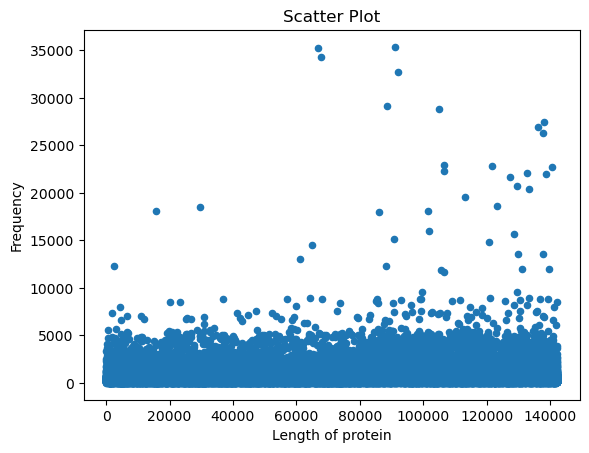

In [28]:
# scatter plot to analyse the length of protein sequences
df_reset = newdf.reset_index()

# Scatter plot using the DataFrame index as x-axis
df_reset.plot.scatter(x='index', y='len')

# Adding labels and title
plt.xlabel('Length of protein')
plt.ylabel('Frequency')
plt.title('Scatter Plot')

plt.show()

In [29]:
# analyse loss of information if max length of protein sequence is set to 5000
filtered_df = df_reset[df_reset['len'] > 5000]
print("Orignal Datset :",len(df_reset))
print("Sequence length >5000 :",len(filtered_df))
print("Complete Sequence :",len(df_reset) -len(filtered_df))

Orignal Datset : 142246
Sequence length >5000 : 253
Complete Sequence : 141993


In [30]:
# analyse loss of information if max length of protein sequence is set to 4000
filtered_df = df_reset[df_reset['len'] > 4000]
print("Orignal Datset :",len(df_reset))
print("Sequence length >4000 :",len(filtered_df))
print("Complete Sequence :",len(df_reset) -len(filtered_df))

Orignal Datset : 142246
Sequence length >4000 : 587
Complete Sequence : 141659


In [31]:
# analyse loss of information if max length of protein sequence is set to 3000
filtered_df = df_reset[df_reset['len'] > 3000]
print("Orignal Datset :",len(df_reset))
print("Sequence length >3000 :",len(filtered_df))
print("Complete Sequence :",len(df_reset) -len(filtered_df))

Orignal Datset : 142246
Sequence length >3000 : 1155
Complete Sequence : 141091


In [32]:
# analyse loss of information if max length of protein sequence is set to 1000
filtered_df = df_reset[df_reset['len'] > 1000]
print("Orignal Datset :",len(df_reset))
print("Sequence length >1000 :",len(filtered_df))
print("Complete Sequence :",len(df_reset) -len(filtered_df))

Orignal Datset : 142246
Sequence length >1000 : 15985
Complete Sequence : 126261


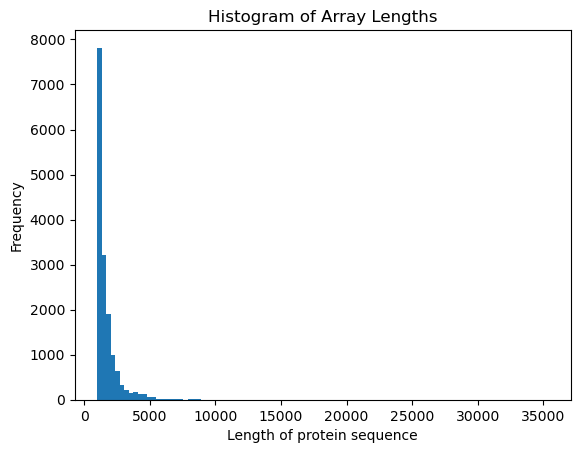

In [33]:
# histogram to analyse the length of protein sequences
plt.hist(filtered_df['len'], bins=100)

#labels and title
plt.xlabel('Length of protein sequence')
plt.ylabel('Frequency')
plt.title('Histogram of Array Lengths')
plt.show()

In [34]:
quantile_summary = newdf['len'].describe(percentiles=[0.1, 0.2,0.3,0.5,0.6,0.7,0.8,0.9])
print("\nQuantile Summary:")
print(quantile_summary)


Quantile Summary:
count    142246.000000
mean        553.616074
std         641.728455
min           3.000000
10%         147.000000
20%         215.000000
30%         281.000000
50%         411.000000
60%         488.000000
70%         585.500000
80%         745.000000
90%        1054.000000
max       35375.000000
Name: len, dtype: float64


In [35]:
# function to truncate protein sequece
def truncateSeq(sequence):
    return sequence[:1000]

In [36]:
#truncate sequence to save computation
newdf['sequence'] = newdf['sequence'].apply(truncateSeq)

In [37]:
#update length
newdf['len'] = newdf['sequence'].apply(len)

In [38]:
print(newdf.dtypes)

EntryId     object
sequence    object
len          int64
dtype: object


In [39]:
display(newdf)

,EntryId,sequence,len
0,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...,218
1,O73864,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...,354
2,O95231,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...,258
3,A0A0B4J1F4,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...,415
4,P54366,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...,415
...,...,...,...
142241,A0A286YAI0,METEVDDFPGKASIFSQVNPLYSNNMKLCEAERYDFQHSEPKTMKS...,450
142242,A0A1D5NUC4,MSAAASAEMIETPPVLNFEEIDYKEIEVEEVVGRGAFGVVCKAKWR...,643
142243,Q5RGB0,MADKGPILTSVIIFYLSIGAAIFQILEEPNLNSAVDDYKNKTNNLL...,448
142244,A0A2R8QMZ5,MGRKKIQITRIMDERNRQVTFTKRKFGLMKKAYELSVLCDCEIALI...,459


In [40]:
!pip install protlearn

In [41]:
# define max length of protein sequence - 1000 (based on the established research assumption)
MAX_LEN = newdf['len'].max()
print(MAX_LEN)

1000


In [42]:
newdf

,EntryId,sequence,len
0,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...,218
1,O73864,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...,354
2,O95231,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...,258
3,A0A0B4J1F4,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...,415
4,P54366,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...,415
...,...,...,...
142241,A0A286YAI0,METEVDDFPGKASIFSQVNPLYSNNMKLCEAERYDFQHSEPKTMKS...,450
142242,A0A1D5NUC4,MSAAASAEMIETPPVLNFEEIDYKEIEVEEVVGRGAFGVVCKAKWR...,643
142243,Q5RGB0,MADKGPILTSVIIFYLSIGAAIFQILEEPNLNSAVDDYKNKTNNLL...,448
142244,A0A2R8QMZ5,MGRKKIQITRIMDERNRQVTFTKRKFGLMKKAYELSVLCDCEIALI...,459


In [43]:
# test encoding function
# seqs = ['ARKLY', 'EERKPGL']
# val = encodeProtein(seqs)

In [44]:

# Setup progressbar settings.
# This is strictly for aesthetic.
import progressbar
bar = progressbar.ProgressBar(maxval=num_of_labels, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

# Create an empty dataframe of required size for storing the labels,
# i.e, train_size x num_of_labels (142246 x 1500)
train_size = newdf.shape[0] # len(X)
train_labels = np.zeros((train_size ,num_of_labels))

# Convert from numpy to pandas series for better handling
series_train_protein_ids = newdf['EntryId'] #pd.Series(trainProteinIds)

# Loop through each label
for i in range(num_of_labels):
    # For each label, fetch the corresponding train_terms data
    n_train_terms = train_terms_updated[train_terms_updated['term'] ==  labels[i]]
    
    # Fetch all the unique EntryId aka proteins related to the current label(GO term ID)
    label_related_proteins = n_train_terms['EntryID'].unique()
    
    # In the series_train_protein_ids pandas series, if a protein is related
    # to the current label, then mark it as 1, else 0.
    # Replace the ith column of train_Y with with that pandas series.
    train_labels[:,i] =  series_train_protein_ids.isin(label_related_proteins).astype(float)
    
    # Progress bar percentage increase
    bar.update(i+1)

# Notify the end of progress bar 
bar.finish()

# Convert train_Y numpy into pandas dataframe
labels_df = pd.DataFrame(data = train_labels, columns = labels)
print(labels_df.shape)

[========================================================================] 100%


(142246, 1500)


In [45]:
display(labels_df)

,GO:0005575,GO:0008150,GO:0110165,GO:0003674,GO:0005622,GO:0009987,GO:0043226,GO:0043229,GO:0005488,GO:0043227,...,GO:0034250,GO:0140053,GO:0031345,GO:0098802,GO:0045861,GO:0051783,GO:0031674,GO:0001818,GO:0006874,GO:0016887
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142241,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142242,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142243,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142244,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [47]:
print(device)

cuda


In [48]:
#training dataloader
from torch.utils.data import Dataset, DataLoader

class CustomProteinDataset(Dataset):
    def __init__(self, trainX, trainY, transform=None):
        self.x = trainX
        self.y = trainY
        self.transform = transform
        
    def __Xshape__(self):
        return self.x.shape
    
    def __len__(self):
        return self.x.shape[0]
    
    def __Yshape__(self):
        return self.y.shape
    
    # fix get item code
    def __getitem__(self, idx):
        return {
            "input": self.x[idx],
            "label": self.y[idx],
        }

In [49]:
# Custom Dataset
proteinDataset = CustomProteinDataset(newdf['sequence'].values,labels_df.values)

print(proteinDataset.__Xshape__())
print(proteinDataset.__Yshape__())
trainDataset, valDataset = torch.utils.data.random_split(proteinDataset, [0.9,0.1])

print(len(trainDataset))
print(len(valDataset))

(142246,)
(142246, 1500)
128022
14224


In [50]:
# parameters
numFeatures = 15
hiddenUnits = 100
numLayers = 3
outputDim = num_of_labels
bias = False
batchFirst = True
dropout = 0.5
batchSize = 400

In [51]:
from torch.autograd import Variable

class lstmModel(nn.Module):
    def __init__(self):
        super(lstmModel, self).__init__()
        self.batchNorm1d = nn.BatchNorm1d(1000)
        self.lstm = nn.LSTM(numFeatures, hiddenUnits, numLayers, bias, batchFirst,dropout=dropout, bidirectional=False)
        self.activation = nn.ReLU()
        self.linear1 = torch.nn.Linear(hiddenUnits, 200)
        self.activation1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 400)
        self.activation2 = torch.nn.ReLU()
        self.linear3 = torch.nn.Linear(400, 800)
        self.activation3 = torch.nn.ReLU()
        self.linear4 = torch.nn.Linear(800, num_of_labels)
        self.sigmoid = nn.Sigmoid()
    
        
    def forward(self, x):
#         x = x.reshape(x.shape[0], 1, x.shape[1])
#         print(x.shape)
#         print(y.shape)
        h0 = Variable(torch.zeros(numLayers, x.size(0), hiddenUnits)).to(device)
        c0 = Variable(torch.zeros(numLayers, x.size(0), hiddenUnits)).to(device)
        x = self.batchNorm1d(x)
        output, (hn, cn) = self.lstm(x, (h0, c0))
#         print(output.shape)
#         print(output[:, -1, :].shape)
#         y = self.activation(output)
        y = self.linear1(output[:, -1, :])
        #print(out1.shape)
        y = self.activation1(y)
        y = self.linear2(y)
        y = self.activation2(y)
        y = self.linear3(y)
        y = self.activation3(y)
        y = self.linear4(y)
#         print(y.shape)
        y = self.sigmoid(y)
#         print(y.shape)
        
        return y
        

In [52]:
from torchmetrics.classification import MultilabelF1Score
import torch.optim.lr_scheduler as lr_scheduler



def trainModel():
    model = lstmModel().to(device)
    print(model)
    
    trainingDataLoader = DataLoader(trainDataset, batch_size=batchSize, shuffle=False)
    validationDataLoader = DataLoader(valDataset, batch_size=batchSize, shuffle=False)
    criterion = nn.BCELoss()
    lr= 0.00003
    optimizer = optim.Adam(model.parameters(),lr=lr) #weight_decay=0.00199
#     scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.99)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2)
    trainLoss = []
    valLossArr = []
    for epoch in range(5):
        running_loss = 0.0
        epoch_steps = 0
        lossArr = []
        f1Arr = []
        for i, data in enumerate(trainingDataLoader, 0):
            inputX, labelY = data['input'], data['label']
            encodings = encodeProteinSequences(inputX, MAX_LEN)
            tensorTrain = torch.tensor(encodings, dtype = torch.float32).to(device)
            tensorLabels = torch.tensor(labelY, dtype = torch.float32).to(device)
            outputs = model.forward(tensorTrain).to(tensorLabels.dtype).to(device)
            loss = criterion(outputs, tensorLabels)
            lossArr.append(loss.item())
            loss.backward()
            optimizer.step() 
        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step(loss.item())
        after_lr = optimizer.param_groups[0]["lr"]
        
        print("Epoch %d: SGD lr %.5f -> %.5f" % (epoch, before_lr, after_lr))
        if epoch % 1 == 0:
            print("Epoch: %d" % (epoch))
            print(type(lossArr))
            a = np.array(lossArr)
            trainLoss.append(a.mean())
            print(a.mean())
            #f1_callback(model, validationDataLoader)
        
        valLoss = 0
        valStep= 0
        for i, data in enumerate(validationDataLoader, 0):
            with torch.no_grad():
                inputX, labelY = data['input'], data['label']
                labelY = labelY.to(device)
                valEncode = encodeProteinSequences(inputX, MAX_LEN)
                #inputX = inputX.reshape(inputX.shape[0], 1, inputX.shape[1])
                tensorTrain = torch.tensor(valEncode, dtype = torch.float32).to(device)
                tensorLabels = torch.tensor(labelY, dtype = torch.float32).to(device)
                outputs = model.forward(tensorTrain).to(tensorLabels.dtype)
                loss = criterion(outputs, tensorLabels)
                valLoss += torch.mean(loss).item()
                valStep += 1 
        valLossArr.append(valLoss/valStep)
        print("Avg loss: %1.5f" % (valLoss/ valStep))
    return model,valLossArr, trainLoss

In [53]:
trainBiLstm, valLoss, trainLoss = trainModel()

lstmModel(
  (batchNorm1d): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(15, 100, num_layers=3, bias=False, batch_first=True, dropout=0.5)
  (activation): ReLU()
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=200, out_features=400, bias=True)
  (activation2): ReLU()
  (linear3): Linear(in_features=400, out_features=800, bias=True)
  (activation3): ReLU()
  (linear4): Linear(in_features=800, out_features=1500, bias=True)
  (sigmoid): Sigmoid()
)


/tmp/ipykernel_29/2698957660.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensorLabels = torch.tensor(labelY, dtype = torch.float32).to(device)


Epoch 0: SGD lr 0.00003 -> 0.00003
Epoch: 0
<class 'list'>
0.40308499424442695


/tmp/ipykernel_29/2698957660.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensorLabels = torch.tensor(labelY, dtype = torch.float32).to(device)


Avg loss: 0.09204
Epoch 1: SGD lr 0.00003 -> 0.00003
Epoch: 1
<class 'list'>
0.09388283981341068
Avg loss: 0.09843
Epoch 2: SGD lr 0.00003 -> 0.00003
Epoch: 2
<class 'list'>
0.09365708557337615
Avg loss: 0.08735
Epoch 3: SGD lr 0.00003 -> 0.00003
Epoch: 3
<class 'list'>
0.08470722027935343
Avg loss: 0.08614
Epoch 4: SGD lr 0.00003 -> 0.00003
Epoch: 4
<class 'list'>
0.08613372129907489
Avg loss: 0.07940


In [54]:
print(valLoss)
print(trainLoss)

[0.09203694719407293, 0.0984327503376537, 0.08734682843916947, 0.08614490222599772, 0.07940379302534792]
[0.40308499424442695, 0.09388283981341068, 0.09365708557337615, 0.08470722027935343, 0.08613372129907489]


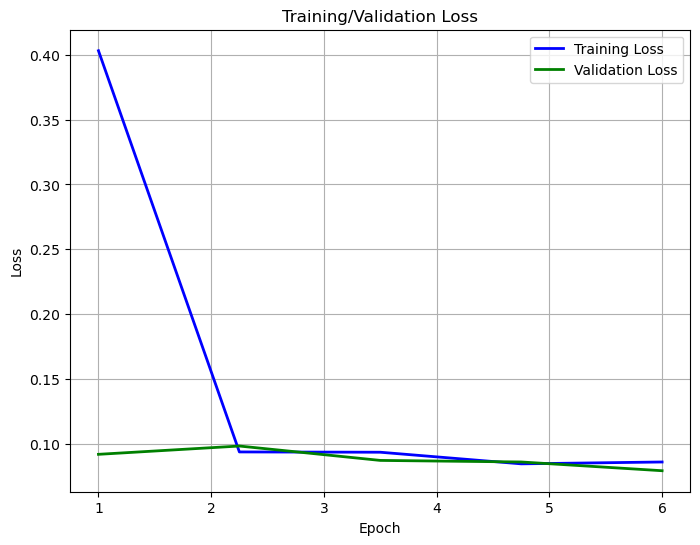

In [55]:
x = np.linspace(1, 6, 5) 
plt.figure(figsize=(8, 6))

# Plot the first line
plt.plot(x, trainLoss, label='Training Loss', color='blue', linewidth=2)

# Plot the second line
plt.plot(x, valLoss, label='Validation Loss', color='green', linewidth=2)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training/Validation Loss')
plt.legend()

# Show the graph
plt.grid(True)
plt.show()

In [56]:
# save model to export
torch.save(trainBiLstm.state_dict(), '/kaggle/working/lstm_models1.pth')

In [57]:
# code for garbage collection

encodings = None
tensorLabels = None
tensorTrain = None
inputX = None
inputY = None
enc = None
paddedData = None
labelY = None
labels_df = None
newdf = None
proteinDataset = None
trainingDataLoader = None
validationDataLoader = None
trainDataset = None
valDataset = None
train_labels = None

del(labels_df)
del(newdf)
del(train_labels)


import gc
gc.collect()

3917

# Testing

In [58]:
testFastaFile = '/kaggle/input/cafa-5-protein-function-prediction/Test (Targets)/testsuperset.fasta'

In [59]:
testDict = createProteinDict(testFastaFile)

In [60]:
for key, value in testDict.items():
    try:
        updatedValue = remove_unnatural_amino_acids(value)
        testDict[key] = updatedValue
    except Exception as e:
        print(f"Error occurred while updating value for key '{key}': {e}")

In [61]:
testDf = pd.DataFrame(list(testDict.items()), columns=['EntryId','sequence'])
display(testDf)

,EntryId,sequence
0,Q9CQV8,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...
1,P62259,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...
2,P68510,MGDREQLLQRARLAEQAERYDDMASAMKAVTELNEPLSNEDRNLLS...
3,P61982,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...
4,O70456,MERASLIQKAKLAEQAERYEDMAAFMKSAVEKGEELSCEERNLLSV...
...,...,...
141859,P08380,GNCKCDDEGPNVRTAPLTGYVDLGYCNEGWEKCASYYSPIAECCRKKK
141860,C0HK72,RGICLEPKVVGPCKARIRRFYYDSETGKCTPFIYGGCGGNGNNFET...
141861,C0HK73,GSICLEPKVVGPCKAGIRRFYFDSETGKCTLFLYGGCKGNGNNFET...
141862,C0HK74,GSICLEPKVVGPCTAYFPRFYFDSETGKCTPFIYGGCEGNGNNFET...


In [62]:
testDf['sequence'] = testDf['sequence'].apply(truncateSeq)

In [63]:
testDf

,EntryId,sequence
0,Q9CQV8,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...
1,P62259,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...
2,P68510,MGDREQLLQRARLAEQAERYDDMASAMKAVTELNEPLSNEDRNLLS...
3,P61982,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...
4,O70456,MERASLIQKAKLAEQAERYEDMAAFMKSAVEKGEELSCEERNLLSV...
...,...,...
141859,P08380,GNCKCDDEGPNVRTAPLTGYVDLGYCNEGWEKCASYYSPIAECCRKKK
141860,C0HK72,RGICLEPKVVGPCKARIRRFYYDSETGKCTPFIYGGCGGNGNNFET...
141861,C0HK73,GSICLEPKVVGPCKAGIRRFYFDSETGKCTLFLYGGCKGNGNNFET...
141862,C0HK74,GSICLEPKVVGPCTAYFPRFYFDSETGKCTPFIYGGCEGNGNNFET...


In [64]:
randomLabel = torch.rand(testDf.shape[0], num_of_labels)

In [65]:

testproteinDataset = CustomProteinDataset(testDf['sequence'].values,randomLabel)

print(testproteinDataset.__Xshape__())
print(testproteinDataset.__Yshape__())

(141864,)
torch.Size([141864, 1500])


In [66]:
preds = []
testDataLoader = DataLoader(testproteinDataset, batch_size=batchSize, shuffle=False)
for i, data in enumerate(testDataLoader, 0):
        with torch.no_grad():
            inputX = data['input']
            testEncode = encodeProteinSequences(inputX, MAX_LEN)
            tensorTrain = torch.tensor(testEncode, dtype = torch.float32).to(device)
            outputs = trainBiLstm.forward(tensorTrain)
            preds.append(outputs)

In [67]:
result = torch.cat(preds, dim=0)
#preds = np.array(preds)
print(result.shape)

torch.Size([141864, 1500])


In [70]:

print(result.dtype)
result = result.to(torch.float16)


torch.float16


In [71]:
testEncode = None
inputX = None
randomLabel = None
testDict = None
testproteinDataset = None
testDataLoader = None
model = None
trainBiLstm = None

del(testEncode)
del(inputX)
del(randomLabel)
del(testDict)
del(testDataLoader)
del(testproteinDataset)
del(model)
del(trainBiLstm)

import gc
gc.collect()

0

For creating submission file we have a seprate file that runs inference without GPU and create a tsv file. This is done in order as creating submission file requires large amount of RAM due to the volume of the data. 
To get predictions use - getResults.ipynb

# References
1. Starter notebook provided by the organizers of CAFA-5
2. https://www.kaggle.com/code/alexandervc/baseline-multilabel-to-multitarget-binary


# END 